# Basic Numerical Methods


## 1. Least Squares Method and Regression Analysis



### a. Least Squares Method

The least squares method minimizes the sum of squared differences between observed and predicted values. It's used to find the best-fitting line in regression analysis.

Mathematically:
$$
	{Error} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
$$
(y_i) = actual value
$$
$$
(\hat{y}_i) = predicted value$$
$$
    


### b. Simple Linear Regression Example

Goal of Linear Regression:

We want to find the best-fitting line: \( y = mx + b \)

Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
Slope (m): 0.7500000000000001
Intercept (b): 1.39
Residuals: [0.027]
Rank of matrix A: 2
Singular values of A: [7.69121313 0.91936964]


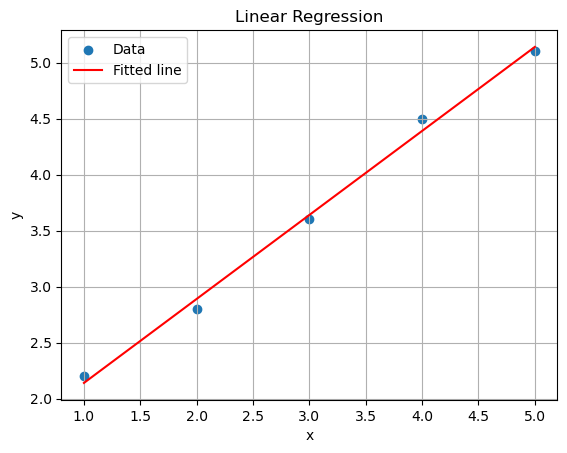

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Design matrix construction based on data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2,2.8,3.6,4.5,5.1])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### Exercise- Make up a set of data and find their best fit using least squares linear regression.

Best fit line: y = 0.60x + 2.20


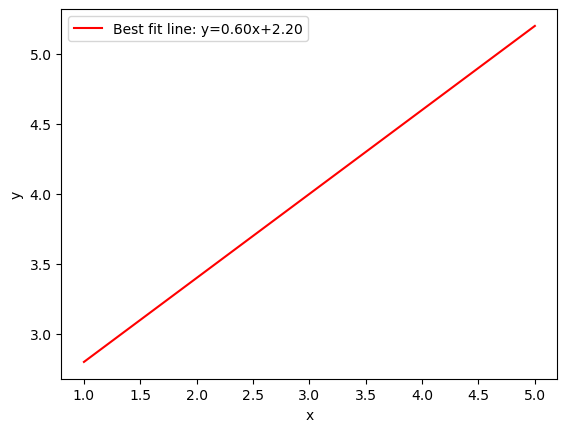

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - m * x_mean

print(f"Best fit line: y = {m:.2f}x + {b:.2f}")

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m*x + b, color='red', label=f'Best fit line: y={m:.2f}x+{b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## 2. Root Finding Methods in Numerical Analysis

This notebook demonstrates two popular numerical methods for finding roots of equations:

1. **Bisection Method**
2. **Newton-Raphson Method**

We will use the function:
\[ f(x) = x^3 - 2x - 5 \]



### a. Bisection Method

The Bisection Method is a simple and robust technique for finding roots of a continuous function. It works by repeatedly halving an interval and selecting the subinterval in which the function changes sign.

#### Algorithm Steps:
1. Define the function f(x)
2. Choose interval [a, b] where f(a) * f(b) < 0
3. Repeat until convergence:
   - Compute midpoint c = (a + b)/2
   - Evaluate f(c)
   - If f(c) * f(a) < 0, set b = c
   - Else, set a = c
   - Stop when |f(c)| is small enough


Root found at x = 1.52138


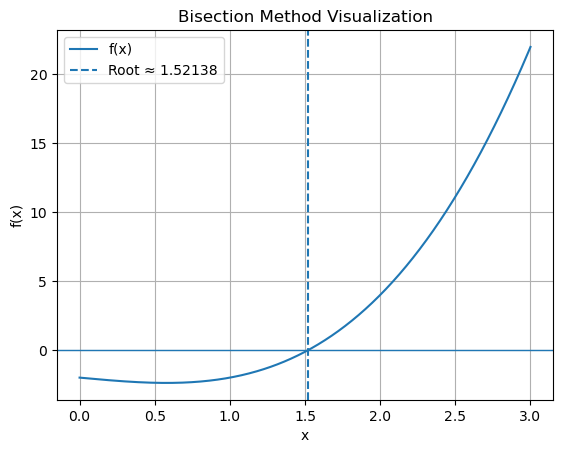

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 2

def bisection(a, b, tol):
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    c = a
    while (b - a) / 2.0 > tol:
        c = (a + b) / 2.0
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c

a, b = 1, 2
root = bisection(a, b, 1e-5)
print(f"Root found at x = {root:.5f}")

x = np.linspace(0, 3, 400)
y = f(x)

plt.plot(x, y, label="f(x)")
plt.axhline(0, linewidth=1)
plt.axvline(root, linestyle='--', label=f'Root ≈ {root:.5f}')
plt.title("Bisection Method Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()



### b. Newton-Raphson Method

The Newton-Raphson Method is an efficient technique for finding roots using the function's derivative.

#### Algorithm Steps:
1. Define the function and its deriative

2. Start with an initial guess \( x_0 \).

3. Repeat 
   Compute the next approximation using:

   $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

   Until:

   $$ |x_{n+1} - x_n| < \varepsilon $$

4. Return the final approximation $$ x_{n+1} $$ as the root.



In [8]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

def newton_raphson(x0, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        x1 = x0 - f(x0)/df(x0)   
        if abs(x1 - x0) < tol:  
            print(f"Converged in {i+1} iterations.")
            return x1
        x0 = x1
    print("Did not converge within the maximum number of iterations.")
    return None

x0 = 2

root_newton = newton_raphson(x0)
print("Root found using Newton-Raphson Method:", root_newton)


Converged in 4 iterations.
Root found using Newton-Raphson Method: 2.0945514815423265


### Root finding exercise: Beam Deflection

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$

#### 🎯 Task:
Use a root-finding method (e.g., Newton-Raphson or Bisection) to find the position \( x \) along the beam where the **maximum deflection** occurs.

#### 💡 Hint:
To find the maximum deflection:
1. Compute the derivative y'(x) 
2. Solve y'(x) = 0  within the interval x in [0, L] 

#### 📌 Constants:
- L = 10 
- w = 5 
- E and I are constants (you may assume EI = 1 for simplicity)

In [ ]:
import numpy as np
from scipy.optimize import bisect, newton

def beam_deflection(x, L=10, w=5, EI=1):
   
    return (w/(24*EI)) * x * (L**3 - 2*L*x**2 + x**3)

def deflection_derivative(x, L=10, w=5, EI=1):
   
    return (w/(24*EI)) * (L**3 - 6*L*x**2 + 4*x**3)

def deflection_second_derivative(x, L=10, w=5, EI=1):
   
    return (w/(24*EI)) * (-12*L*x + 12*x**2)

def find_max_deflection_position():

    L = 10
    w = 5
    EI = 1
    
    print("Beam Deflection Analysis")
    print("=" * 50)
    print(f"Beam length (L): {L} m")
    print(f"Distributed load (w): {w} kN/m")
    print(f"EI: {EI}")
    print()
    
    print("Method 1: Bisection Method")
    print("-" * 30)
   
    def f(x):
        return deflection_derivative(x, L, w, EI)
    
 
    
   
    x_analytical = L / np.sqrt(3)
    y_analytical = beam_deflection(x_analytical, L, w, EI)
    print(f"Analytical position: x = L/√3 = {x_analytical:.6f} m")
    print(f"Maximum deflection: y = {y_analytical:.6f} m")
    
    print()
    
    print("Verification")
    print("-" * 30)
    derivative_at_solution = deflection_derivative(x_bisect, L, w, EI)
    print(f"y'(x) at solution: {derivative_at_solution:.2e}")
    print("(Should be very close to zero)")
    
    return x_bisect, y_max_bisect

def plot_deflection():

    import matplotlib.pyplot as plt
    
    L = 10
    w = 5
    EI = 1
    
    x_vals = np.linspace(0, L, 1000)
    y_vals = beam_deflection(x_vals, L, w, EI)
    
    x_max, y_max = find_max_deflection_position()
    